##                           FashinMart - Cohort analysis ( Customer retention )

In [ ]:
########################################################################################################################
#
# Script name               - FashionMart_Cohort_analysis.ipynb
# Script description        - This notebook will do download data from cloud and do Customer Segmentation based on RMF
# Usage                     - 
# Input Params needed       - 
#
#
#  Date                        Author                        Modification                       Description
# =====                       =======                        =============                     =============
# 17-Sep-2019                 Praveen                        Created
#
#
########################################################################################################################

## Business description


### Building time-based cohorts
To know Customer retention in FashinMart , we are going to build time-based cohorts that will assign the acquisition month to each customer i.e. the month when each customer made their first paid transaction with this company.

We will then calculate several metrics such:

##### retention
##### average quantity
##### average sales
##### average total basket sum




Imprting necessary libraries 

In [2]:
import reusables as re
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab

warnings.simplefilter('ignore')

In [4]:
script_name='CC_2_Market_Basket_analysis-Customer_Segments'
reusable = re.reusables()

## Data preperation

In [5]:
df_mba_data = pd.read_csv(reusable.path_sources+'exercise2_input.csv',converters={'Quantity':int,'Sales':float})

In [7]:
df_mba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 8 columns):
RowID          9994 non-null int64
OrderID        9994 non-null object
OrderDate      9994 non-null object
CustomerID     9994 non-null object
ProductID      9994 non-null object
ProductName    9994 non-null object
Sales          9994 non-null float64
Quantity       9994 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 624.7+ KB


In [8]:
df_mba_data['OrderDate'] = pd.to_datetime(df_mba_data['OrderDate'])
df_mba_data["year"] = df_mba_data["OrderDate"].dt.year

## Stand. the data 

In [88]:
df_cust_cohrt = df_mba_data.groupby(['year','CustomerID','OrderDate','ProductID','ProductName']).agg({'Sales':'sum', 'Quantity':'sum'}).reset_index()

Adding OrderMonth in the dataset for analysis

In [89]:
df_cust_cohrt['OrderMonth'] = df_cust_cohrt['OrderDate'].apply(lambda x: datetime.datetime(x.year, x.month, 1))

Adding customer acquisition month to the dataset

In [90]:
df_cust_cohrt['CohortMonth'] = df_cust_cohrt.groupby('CustomerID')['OrderMonth'].transform('min')

In [91]:
df_cust_cohrt.head()

,year,CustomerID,OrderDate,ProductID,ProductName,Sales,Quantity,OrderMonth,CohortMonth
0,2014,AA-10315,2014-03-31,OFF-AP-10002765,Fellowes Advanced Computer Series Surge Protec...,52.980,2,2014-03-01,2014-03-01
1,2014,AA-10315,2014-03-31,OFF-BI-10004390,GBC DocuBind 200 Manual Binding Machine,673.568,2,2014-03-01,2014-03-01
2,2014,AA-10315,2014-09-15,FUR-FU-10002456,"Master Caster Door Stop, Large Neon Orange",14.560,2,2014-09-01,2014-03-01
3,2014,AA-10315,2014-09-15,OFF-PA-10000349,Easy-staple paper,14.940,3,2014-09-01,2014-03-01
4,2014,AA-10375,2014-04-21,OFF-BI-10002976,ACCOHIDE Binder by Acco,16.520,5,2014-04-01,2014-04-01


## Calculate cohort index - nth month offset
Cohort index will allow us to normalize the metrics and compare them for each monthly cohort. This way we can assess the performance of each monthly cohort for a given nth month after customer's acquisition.

What we do is take a difference between the dates, and add plus one, in order to have one based indexing which is easier to interpret in a business context.

In [92]:
df_cust_cohrt['CohortIndex'] = (
    df_cust_cohrt['OrderMonth'].apply(lambda x: x.year) - df_cust_cohrt['CohortMonth'].apply(lambda x: x.year))*12 + \
    (df_cust_cohrt['OrderMonth'].apply(lambda x: x.month) - df_cust_cohrt['CohortMonth'].apply(lambda x: x.month)) + 1

In [93]:
df_cust_cohrt.head()

,year,CustomerID,OrderDate,ProductID,ProductName,Sales,Quantity,OrderMonth,CohortMonth,CohortIndex
0,2014,AA-10315,2014-03-31,OFF-AP-10002765,Fellowes Advanced Computer Series Surge Protec...,52.980,2,2014-03-01,2014-03-01,1
1,2014,AA-10315,2014-03-31,OFF-BI-10004390,GBC DocuBind 200 Manual Binding Machine,673.568,2,2014-03-01,2014-03-01,1
2,2014,AA-10315,2014-09-15,FUR-FU-10002456,"Master Caster Door Stop, Large Neon Orange",14.560,2,2014-09-01,2014-03-01,7
3,2014,AA-10315,2014-09-15,OFF-PA-10000349,Easy-staple paper,14.940,3,2014-09-01,2014-03-01,7
4,2014,AA-10375,2014-04-21,OFF-BI-10002976,ACCOHIDE Binder by Acco,16.520,5,2014-04-01,2014-04-01,1


## Creating a string cohort month value
We will use this column to create a retention heatmap, and it will look much more beautiful in a short year-month format, than a full timestamp.

In [94]:
df_cust_cohrt['CohortMonth'] = df_cust_cohrt['CohortMonth'].apply(lambda x: x.strftime('%Y-%m'))

In [95]:
df_cust_cohrt.head()

,year,CustomerID,OrderDate,ProductID,ProductName,Sales,Quantity,OrderMonth,CohortMonth,CohortIndex
0,2014,AA-10315,2014-03-31,OFF-AP-10002765,Fellowes Advanced Computer Series Surge Protec...,52.980,2,2014-03-01,2014-03,1
1,2014,AA-10315,2014-03-31,OFF-BI-10004390,GBC DocuBind 200 Manual Binding Machine,673.568,2,2014-03-01,2014-03,1
2,2014,AA-10315,2014-09-15,FUR-FU-10002456,"Master Caster Door Stop, Large Neon Orange",14.560,2,2014-09-01,2014-03,7
3,2014,AA-10315,2014-09-15,OFF-PA-10000349,Easy-staple paper,14.940,3,2014-09-01,2014-03,7
4,2014,AA-10375,2014-04-21,OFF-BI-10002976,ACCOHIDE Binder by Acco,16.520,5,2014-04-01,2014-04,1


In [96]:
df_cust_cohrt['Unitprice']=df_cust_cohrt['Sales']/df_cust_cohrt['Quantity']

In [97]:
grouping = df_cust_cohrt.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = grouping.agg({'CustomerID': pd.Series.nunique,
                           'Unitprice': np.mean,
                           'Quantity': np.mean,
                           'Sales': np.mean})

cohort_data.rename(columns = {'CustomerID': 'CustomerCount',
                           'Unitprice': 'AveragePrice',
                           'Quantity': 'AverageQuantity',
                           'Sales': 'AverageSales'}, inplace = True)

## Creating a pivot table with active purchasers from each cohort
We will create a pivot table with CohortMonth in rows, and CohortIndex in columns, with CustomerCount as the values.

In [98]:
cohort_data.reset_index(level=['CohortMonth', 'CohortIndex'], inplace=True)
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerCount')

In [99]:
cohort_counts.head(20)

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2014-01,57.0,2.0,8.0,1.0,7.0,8.0,10.0,7.0,8.0,2.0,...,12.0,13.0,7.0,9.0,7.0,5.0,15.0,6.0,16.0,7.0
2014-02,45.0,5.0,6.0,3.0,4.0,5.0,1.0,5.0,4.0,4.0,...,5.0,7.0,7.0,7.0,6.0,7.0,9.0,8.0,5.0,NaN
2014-03,66.0,9.0,2.0,1.0,4.0,3.0,6.0,1.0,10.0,8.0,...,13.0,12.0,10.0,9.0,10.0,11.0,14.0,15.0,NaN,NaN
2014-04,43.0,3.0,1.0,2.0,3.0,6.0,4.0,8.0,8.0,5.0,...,7.0,9.0,6.0,8.0,5.0,10.0,7.0,NaN,NaN,NaN
2014-05,62.0,5.0,5.0,7.0,4.0,2.0,11.0,10.0,NaN,3.0,...,8.0,14.0,16.0,11.0,15.0,7.0,NaN,NaN,NaN,NaN
2014-06,49.0,4.0,2.0,5.0,2.0,8.0,6.0,1.0,3.0,6.0,...,5.0,8.0,9.0,14.0,12.0,NaN,NaN,NaN,NaN,NaN
2014-07,39.0,1.0,8.0,1.0,5.0,6.0,4.0,6.0,3.0,5.0,...,14.0,5.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-08,45.0,9.0,2.0,7.0,5.0,4.0,4.0,3.0,2.0,5.0,...,11.0,12.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09,52.0,3.0,4.0,5.0,6.0,3.0,7.0,7.0,4.0,1.0,...,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Calculate retention rates
First, we're going to extract cohort size on the first month of their tenure with the company. Next, we will divide the number of active purchasers from each cohort by the size of that cohort. The result is a retention metric per each monthly cohort.

In [100]:
cohort_sizes = cohort_counts[1].values
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [101]:
retention.head(20)

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2014-01,1.0,0.035088,0.140351,0.017544,0.122807,0.140351,0.175439,0.122807,0.140351,0.035088,...,0.210526,0.228070,0.122807,0.157895,0.122807,0.087719,0.263158,0.105263,0.280702,0.122807
2014-02,1.0,0.111111,0.133333,0.066667,0.088889,0.111111,0.022222,0.111111,0.088889,0.088889,...,0.111111,0.155556,0.155556,0.155556,0.133333,0.155556,0.200000,0.177778,0.111111,NaN
2014-03,1.0,0.136364,0.030303,0.015152,0.060606,0.045455,0.090909,0.015152,0.151515,0.121212,...,0.196970,0.181818,0.151515,0.136364,0.151515,0.166667,0.212121,0.227273,NaN,NaN
2014-04,1.0,0.069767,0.023256,0.046512,0.069767,0.139535,0.093023,0.186047,0.186047,0.116279,...,0.162791,0.209302,0.139535,0.186047,0.116279,0.232558,0.162791,NaN,NaN,NaN
2014-05,1.0,0.080645,0.080645,0.112903,0.064516,0.032258,0.177419,0.161290,NaN,0.048387,...,0.129032,0.225806,0.258065,0.177419,0.241935,0.112903,NaN,NaN,NaN,NaN
2014-06,1.0,0.081633,0.040816,0.102041,0.040816,0.163265,0.122449,0.020408,0.061224,0.122449,...,0.102041,0.163265,0.183673,0.285714,0.244898,NaN,NaN,NaN,NaN,NaN
2014-07,1.0,0.025641,0.205128,0.025641,0.128205,0.153846,0.102564,0.153846,0.076923,0.128205,...,0.358974,0.128205,0.230769,0.153846,NaN,NaN,NaN,NaN,NaN,NaN
2014-08,1.0,0.200000,0.044444,0.155556,0.111111,0.088889,0.088889,0.066667,0.044444,0.111111,...,0.244444,0.266667,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09,1.0,0.057692,0.076923,0.096154,0.115385,0.057692,0.134615,0.134615,0.076923,0.019231,...,0.153846,0.173077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Let see heatmap of retention rates 

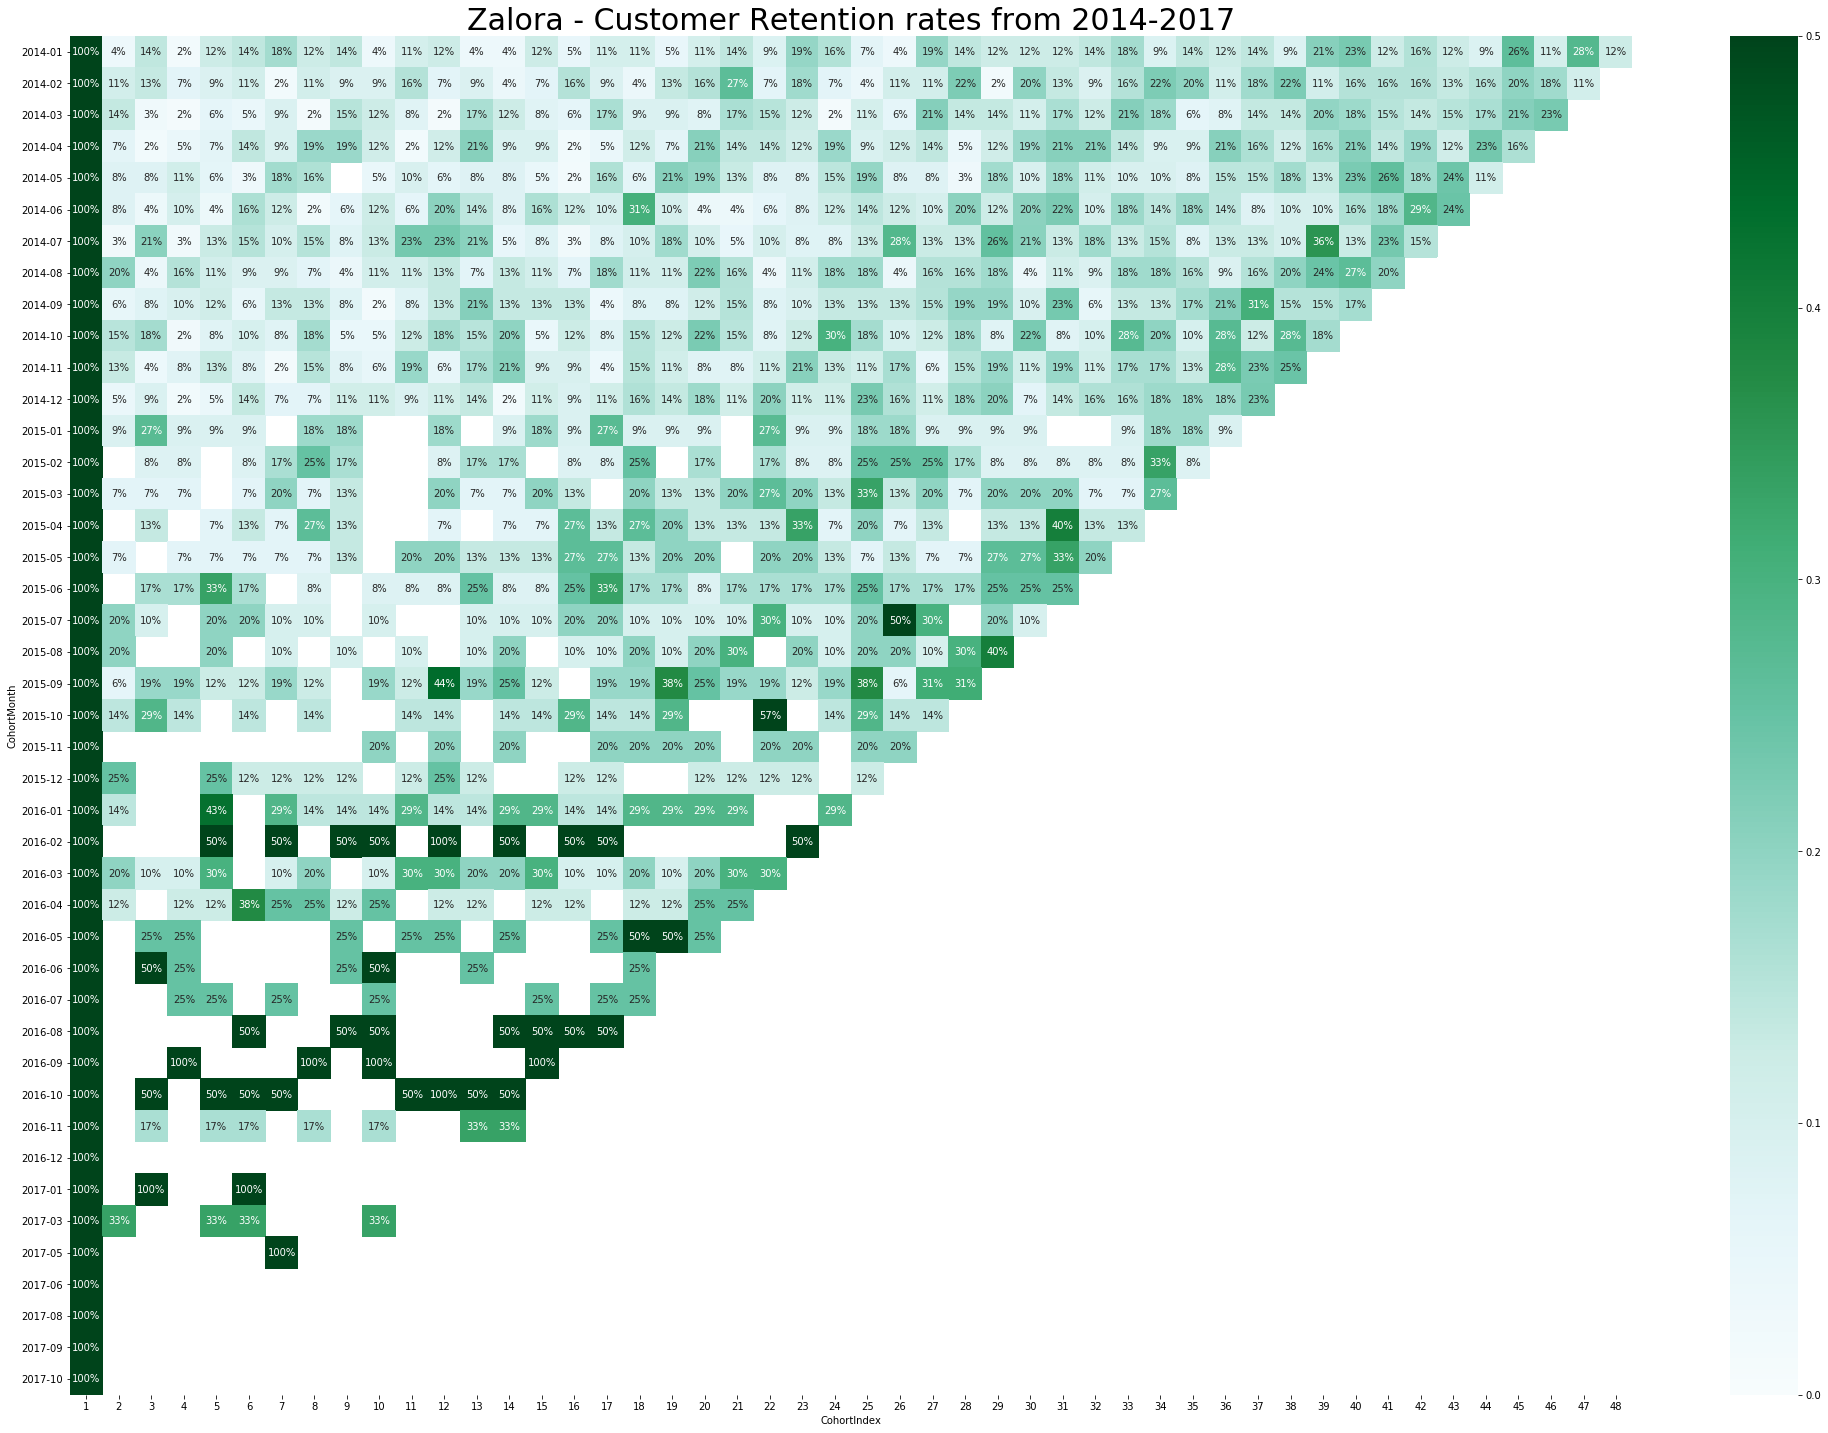

In [102]:
import seaborn as sns

plt.figure(figsize=(35, 25))
plt.title('FashinMart - Customer Retention rates from 2014-2017',size=30)
sns.heatmap(retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='BuGn')
plt.show()

## Calculate average monthly spend per cohort and plot a heatmap

In [103]:
cohort_totalsum = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='AverageSales')
cohort_totalsum

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
CohortMonth,,,,,,,,,,,,,,,,,,,,,
2014-01,221.020656,165.911500,103.766444,174.268500,172.520533,216.058000,210.708000,112.460857,239.069700,97.786500,...,150.552800,54.707400,223.755500,146.423000,148.935111,76.062500,97.182000,287.038333,545.011559,110.6335
2014-02,147.310512,486.125000,210.292800,100.523143,105.415043,65.449333,423.280000,1032.677500,518.591818,169.976615,...,39.119875,132.686444,376.243333,171.082533,375.630316,51.671778,163.881727,149.935471,114.032286,NaN
2014-03,344.389965,71.068824,310.582000,52.425000,175.121833,75.510400,40.267294,211.960000,206.939333,214.583400,...,88.318000,300.492923,124.246375,371.712941,232.999706,224.161953,319.480447,87.239405,NaN,NaN
2014-04,232.604989,210.982250,83.920000,101.462429,174.914800,373.738400,59.010000,310.763412,167.199833,300.582833,...,271.372653,239.994667,117.750800,309.622378,80.322375,140.145579,313.026588,NaN,NaN,NaN
2014-05,206.337043,248.618286,183.037000,117.446500,56.170667,107.770000,436.568652,318.424907,NaN,248.479143,...,213.404931,273.752286,104.420909,298.626429,204.030444,121.936600,NaN,NaN,NaN,NaN
2014-06,238.876280,329.500333,42.163200,71.935100,201.061000,151.263286,139.768769,6.680000,131.766000,165.828222,...,65.517143,150.758722,380.195238,223.332471,97.677212,NaN,NaN,NaN,NaN,NaN
2014-07,260.788671,472.450000,420.455222,372.193500,277.014444,268.088778,453.516489,201.878000,29.214400,351.481167,...,192.094357,109.643143,164.614929,155.040000,NaN,NaN,NaN,NaN,NaN,NaN
2014-08,300.639671,367.246645,243.808667,181.565833,190.206727,129.653333,66.470500,78.795143,262.486000,40.619636,...,175.895920,154.539850,64.187263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09,231.599998,87.495333,347.250286,215.304750,559.022400,523.004333,67.015000,192.165000,570.238571,18.410400,...,202.290667,143.595800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Average Monthly spend by cohart heatmap

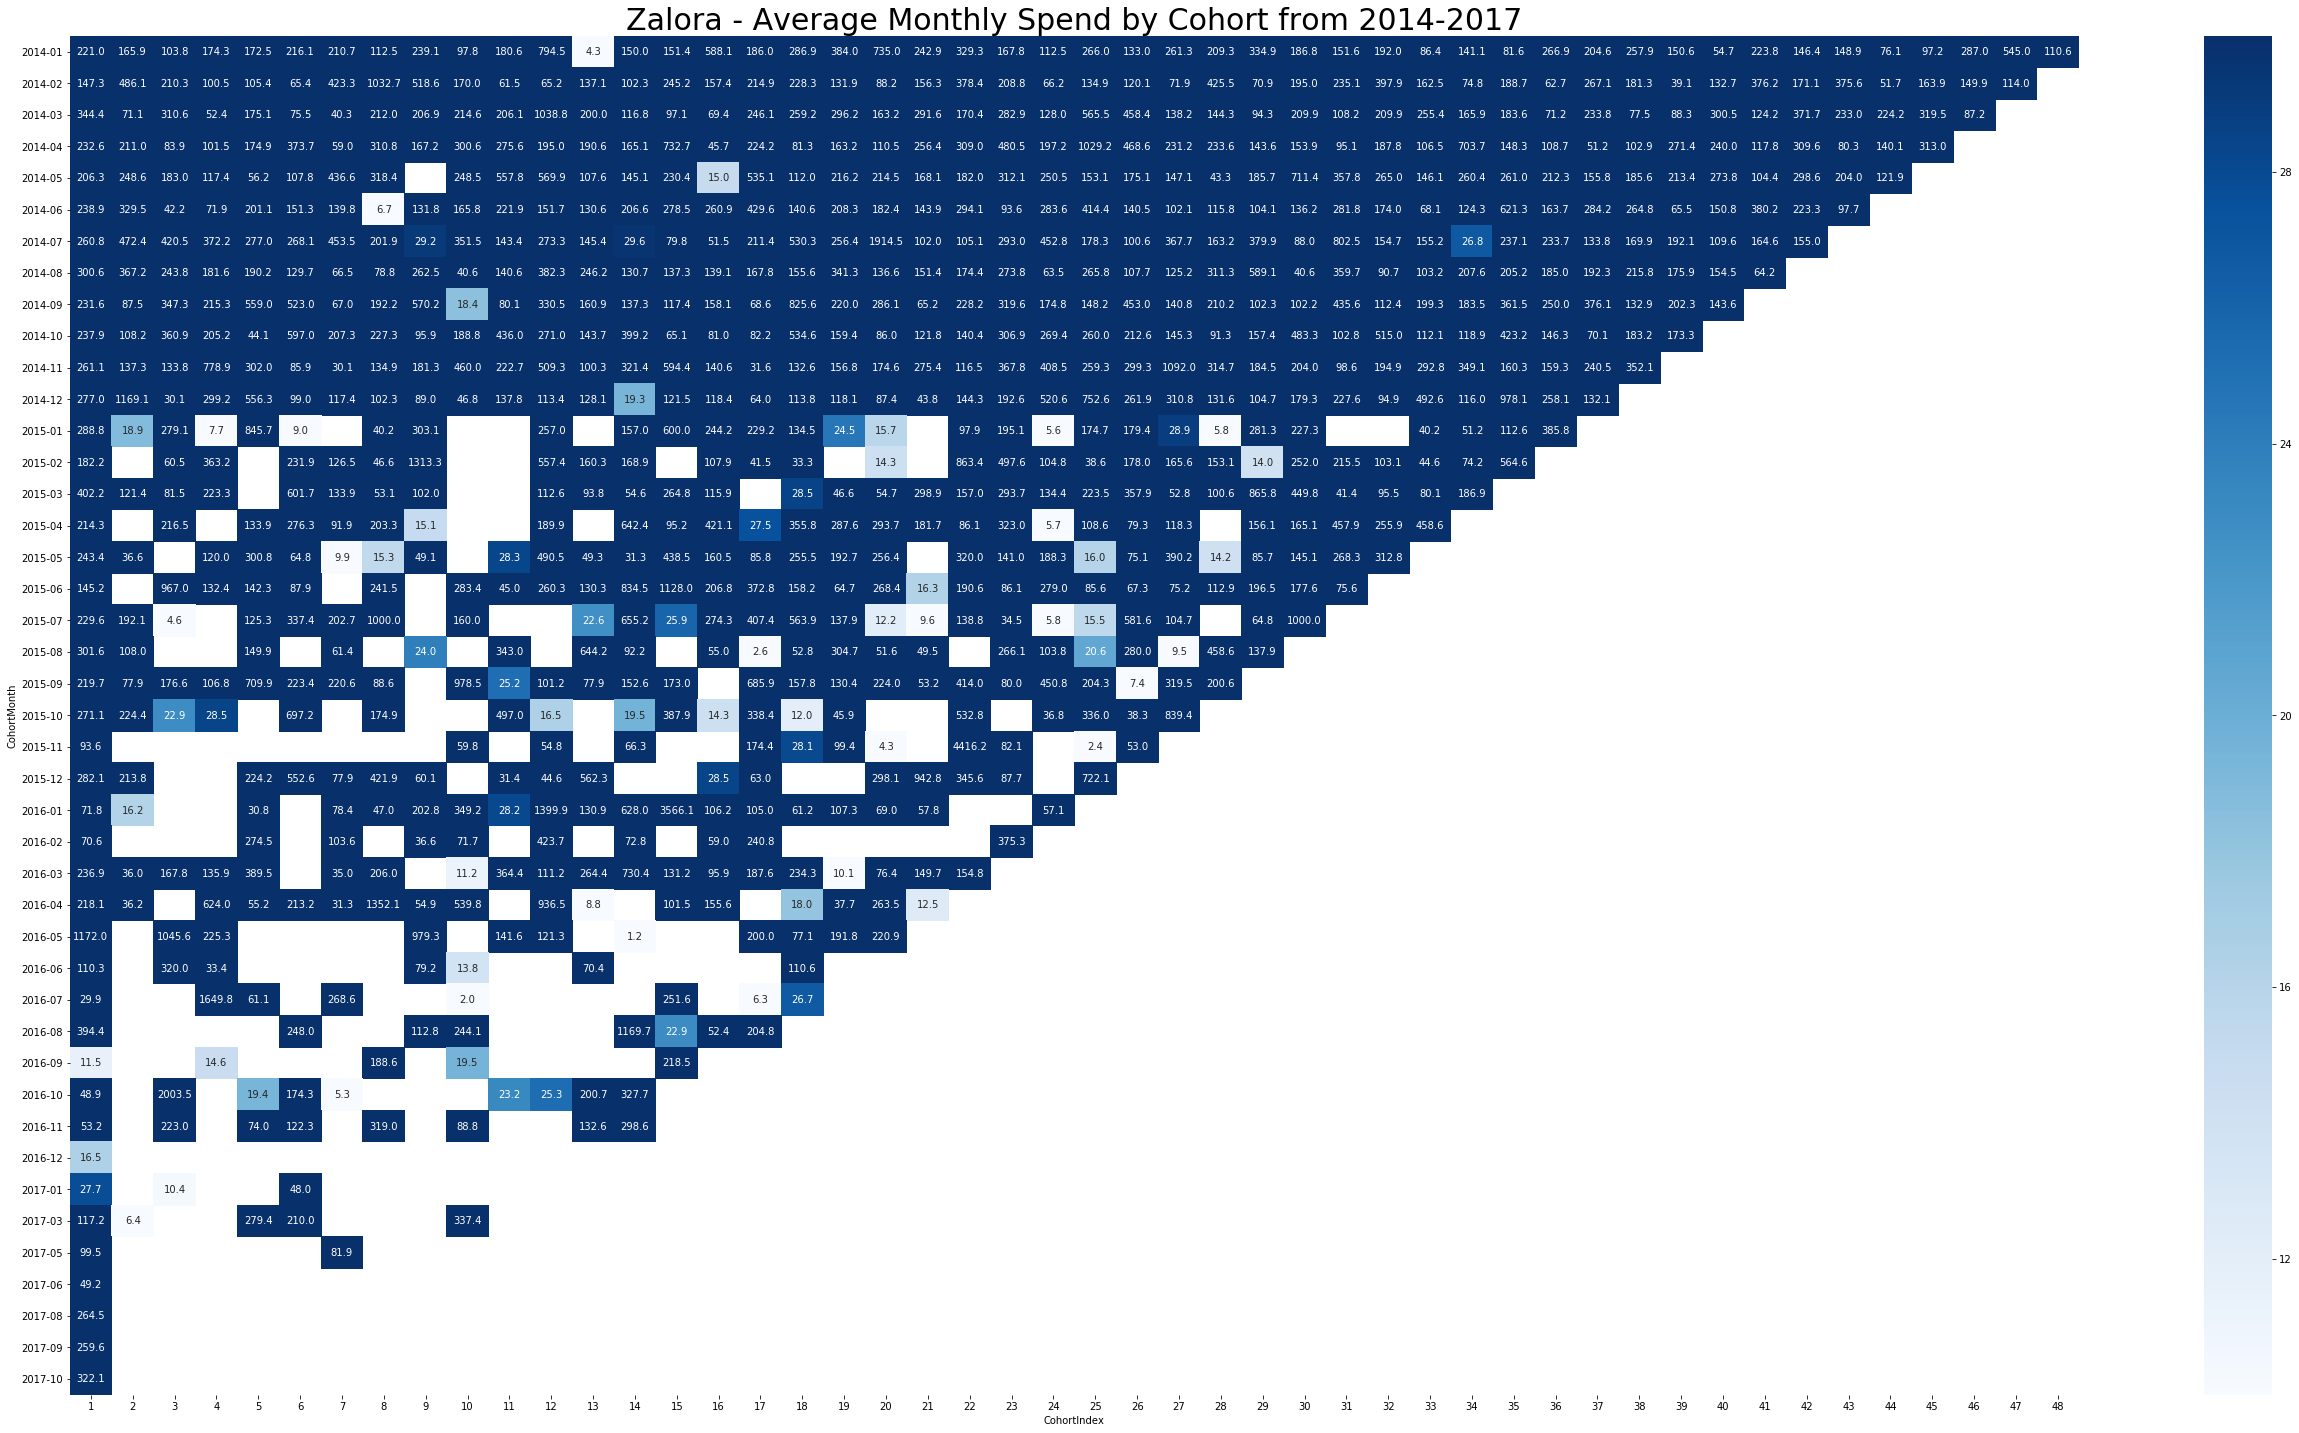

In [104]:
plt.figure(figsize=(45, 25))
plt.title('FashinMart - Average Monthly Spend by Cohort from 2014-2017',size=30)
sns.heatmap(cohort_totalsum, annot=True, fmt='.1f', vmin=10, vmax = 30, cmap='Blues')
plt.show()

## Observation

Based on the above heatmap , For Jan-2015 Customer engagement on sales is low.
Customers who joined in 2017 are less likely to contribute on sales

## Building size-based cohorts
In this section we are going to build cohorts based on size of their transactions on the first month, and convert them into quartiles and other percentiles that will define their cohorts.

We will calculate these size-based cohorts:

#### 2.1. Sales quartiles

#### 2.2. Sales deciles

### 2.1. Sales quartiles

In [105]:
df_cust_cohrt_first_sales = df_cust_cohrt[df_cust_cohrt['CohortIndex'] == 1].groupby(['CustomerID'])['Sales'].agg('sum').reset_index()
df_cust_cohrt_first_sales.head(10)

,CustomerID,Sales
0,AA-10315,726.548
1,AA-10375,16.520
2,AA-10480,27.460
3,AA-10645,327.560
4,AB-10015,12.624
5,AB-10060,18.540
6,AB-10105,1107.660
7,AB-10150,705.562
8,AB-10165,37.296
9,AB-10255,19.680


Split the data into 4 part based on total sales percent

In [113]:
df_cust_cohrt_first_sales['Sales_quartile'] = (pd.qcut(df_cust_cohrt['Sales'], 4, labels = list(reversed(range(1,5)))))
df_cust_cohrt = df_cust_cohrt.merge(df_cust_cohrt_first_sales[['CustomerID', 'Sales_quartile']], on='CustomerID', how='left')

In [114]:
df_cust_cohrt.columns

Index(['year', 'CustomerID', 'OrderDate', 'ProductID', 'ProductName', 'Sales',
       'Quantity', 'OrderMonth', 'CohortMonth', 'CohortIndex', 'Unitprice',
       'Sales_quartile'],
      dtype='object')

In [115]:

grouping = df_cust_cohrt.groupby(['Sales_quartile', 'CohortIndex'])

cohort_data = grouping.agg({'CustomerID': pd.Series.nunique,
                           'Unitprice': np.mean,
                           'Quantity': np.mean,
                           'Sales': np.mean})

cohort_data.rename(columns = {'CustomerID': 'CustomerCount',
                           'UnitPrice': 'AveragePrice',
                           'Quantity': 'AverageQuantity',
                           'Sales': 'AverageSales'}, inplace = True)

In [116]:
cohort_counts = cohort_data.reset_index().pivot(index='Sales_quartile', columns='CohortIndex', values='CustomerCount')
cohort_sizes = cohort_counts[1].values
retention = cohort_counts.divide(cohort_sizes, axis=0)

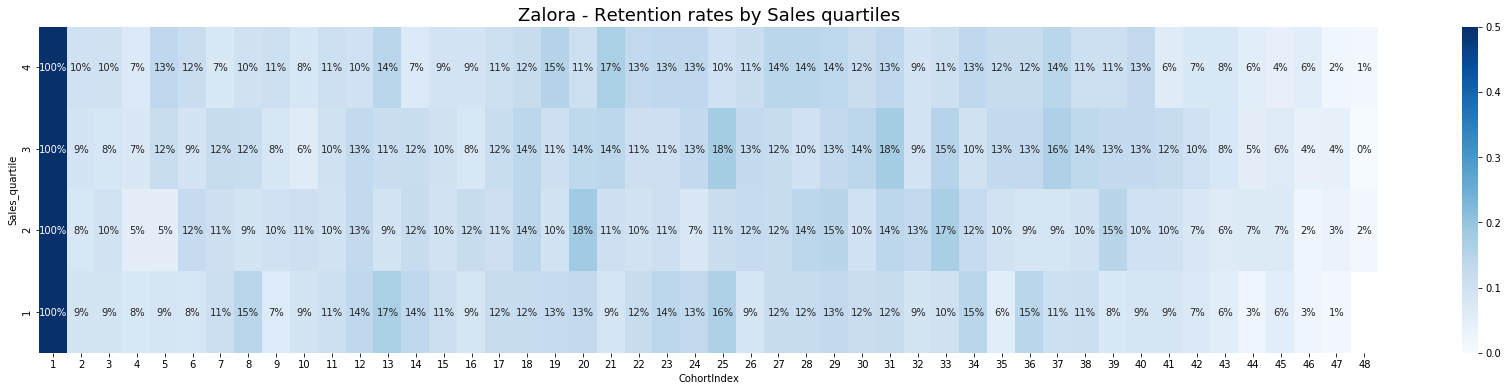

In [117]:
import seaborn as sns

plt.figure(figsize=(30, 6))
plt.title('FashinMart - Retention rates by Sales quartiles',size=18)
sns.heatmap(retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='Blues')
plt.show()

### 2.2. Sales deciles

In [118]:
df_cust_cohrt_first_sales['Sales_decile'] = (pd.qcut(df_cust_cohrt_first_sales['Sales'], 10, labels = list(reversed(range(1,11)))))
df_cust_cohrt = df_cust_cohrt.merge(df_cust_cohrt_first_sales[['CustomerID', 'Sales_decile']], on='CustomerID', how='left')

In [119]:
grouping = df_cust_cohrt.groupby(['Sales_decile', 'CohortIndex'])

cohort_data = grouping.agg({'CustomerID': pd.Series.nunique,
                           'Unitprice': np.mean,
                           'Quantity': np.mean,
                           'Sales': np.mean})

cohort_data.rename(columns = {'CustomerID': 'CustomerCount',
                           'UnitPrice': 'AveragePrice',
                           'Quantity': 'AverageQuantity',
                           'Sales': 'AverageSales'}, inplace = True)

In [120]:
cohort_data.reset_index(level=['Sales_decile', 'CohortIndex'], inplace=True)
cohort_counts = cohort_data.pivot(index='Sales_decile', columns='CohortIndex', values='CustomerCount')
cohort_sizes = cohort_counts[1].values
retention = cohort_counts.divide(cohort_sizes, axis=0)

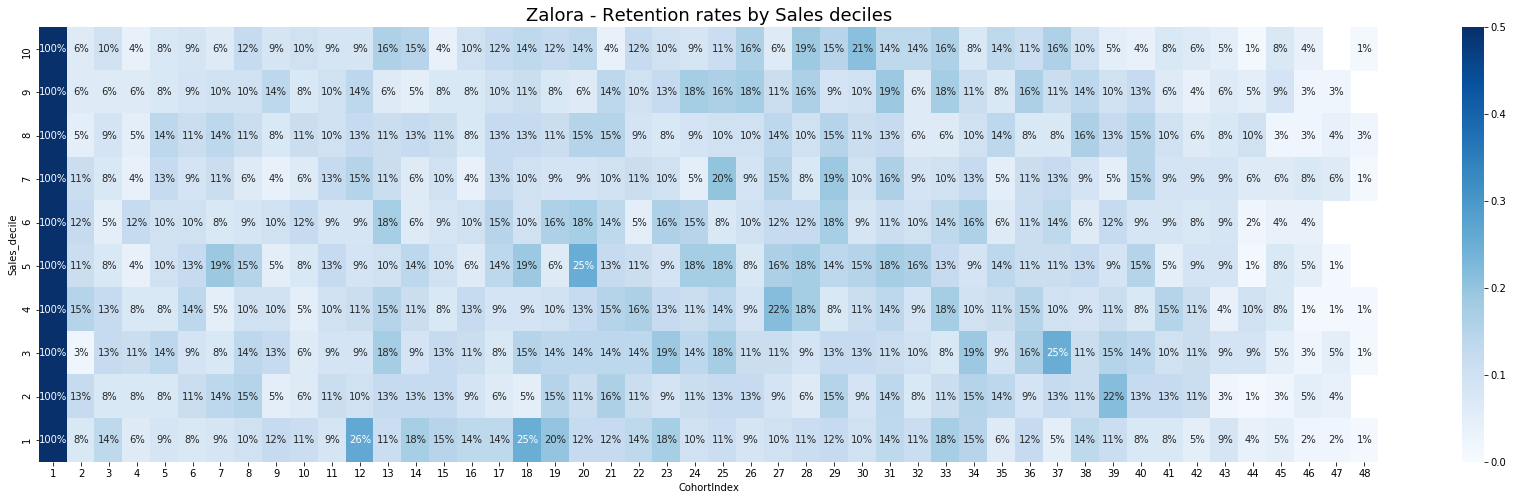

In [123]:
plt.figure(figsize=(30, 8))
plt.title('FashinMart - Retention rates by Sales deciles',size=18)
sns.heatmap(retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='Blues')
plt.show()

## Conclusion :-

Customer retention with respect to recency is good at FashionMart is good till Dec-2015, 
From 2015 onwords there is intermitent in customer retention.

With respect to monthly trend we observe the same behavior in all Coharts
